In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from utils import load_rx_data, stress_test_files

In [8]:
data = load_rx_data(stress_test_files[0])

In [9]:
data.rx_timestamp -= data.rx_timestamp.min()

In [10]:
data.rx_timestamp

0         0.00
1         0.01
2         0.03
3         0.12
4         0.18
         ...  
3231    177.70
3232    177.79
3233    177.89
3234    178.00
3235    178.11
Name: rx_timestamp, Length: 3236, dtype: float64

In [11]:
sensor_node = data[data['node'] == 'WithPD']
noise_node = data[data['node'] == 'WoutPD']

In [12]:
print(len(data))
print(len(sensor_node))
print(len(noise_node))

3236
1703
1533


In [13]:
sensor_node.packet_number.max()

1778

In [14]:
sensor_node.packet_number.nunique()

1703

In [15]:
sensor_node.packet_number.value_counts()

packet_number
0       1
1198    1
1196    1
1195    1
1194    1
       ..
596     1
595     1
594     1
593     1
1778    1
Name: count, Length: 1703, dtype: int64

In [16]:
sensor_node.packet_number

7          0
8          1
9          2
10         3
11         4
        ... 
3223    1774
3224    1775
3227    1776
3228    1777
3229    1778
Name: packet_number, Length: 1703, dtype: int64

In [17]:
def per_both(df, timestamp):
    df = df[df['rx_timestamp'] <= timestamp]
    n_received = len(df)
    sensor_node_sent = df[df['node'] == 'WithPD'].packet_number.max() + 1
    noise_node_sent = df[df['node'] == 'WoutPD'].packet_number.max() + 1
    total_sent = sensor_node_sent + noise_node_sent
    ratio = n_received / total_sent
    return 1 - ratio

In [18]:
def per_ind(df, timestamp):
    data = df[df['rx_timestamp'] <= timestamp]
    n_received = len(data)
    total_sent = data.packet_number.max() + 1
    ratio = n_received / total_sent
    return 1 - ratio

In [19]:
both_per = np.asarray([
    (i, per_both(data, i)) for i in range(180)
])

In [20]:
noise_per = np.asarray([
    (i, per_ind(noise_node, i)) for i in range(180)
])

In [21]:
sensor_per = np.asarray([
    (i, per_ind(sensor_node, i)) for i in range(180)
])

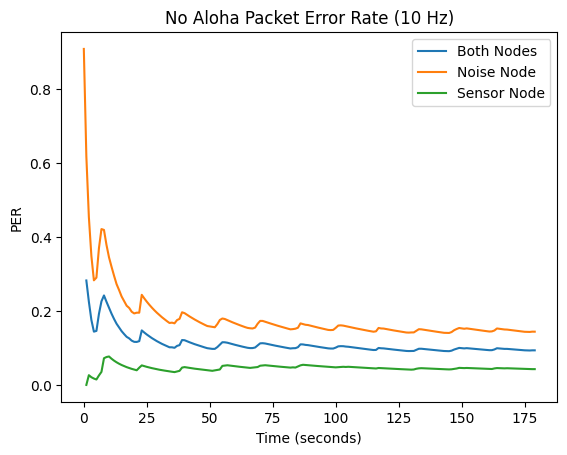

In [22]:
plt.plot(both_per[:,0], both_per[:,1], label='Both Nodes')
plt.plot(noise_per[:,0], noise_per[:,1], label='Noise Node')
plt.plot(sensor_per[:,0], sensor_per[:,1], label='Sensor Node')

plt.title("No Aloha Packet Error Rate (10 Hz)")
plt.xlabel("Time (seconds)")
plt.ylabel("PER")
plt.legend()
plt.show()

In [23]:
def generate_per_graph(dataframe, title, outfile=None):
    data.rx_timestamp -= data.rx_timestamp.min()
    sensor_node = data[data['node'] == 'WithPD']
    noise_node = data[data['node'] == 'WoutPD']

    both_per = np.asarray([
        (i, per_both(data, i)) for i in range(180)
    ])
    noise_per = np.asarray([
        (i, per_ind(noise_node, i)) for i in range(180)
    ])
    sensor_per = np.asarray([
        (i, per_ind(sensor_node, i)) for i in range(180)
    ])

    plt.plot(both_per[:,0], both_per[:,1], label='Both Nodes')
    plt.plot(noise_per[:,0], noise_per[:,1], label='Secondary Node')
    plt.plot(sensor_per[:,0], sensor_per[:,1], label='Primary Node')

    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("PER")
    plt.legend()
    if outfile:
        plt.savefig(outfile)
    plt.show()

    
    

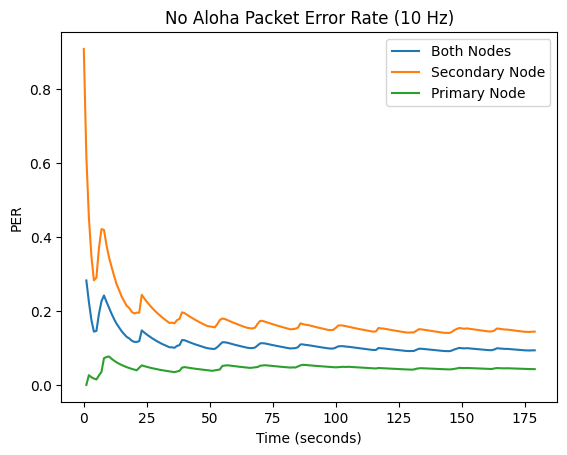

In [24]:
outfile = 'no_aloha_stresstest_10hz.png'
data = load_rx_data(stress_test_files[0])
generate_per_graph(data, "No Aloha Packet Error Rate (10 Hz)", outfile=outfile)

In [25]:
outfile = 'no_aloha_stresstest_50hz.png'
data = load_rx_data(stress_test_files[1])
generate_per_graph(data, "No Aloha Packet Error Rate (50 Hz)", outfile=outfile)

NameError: name 'load_data' is not defined

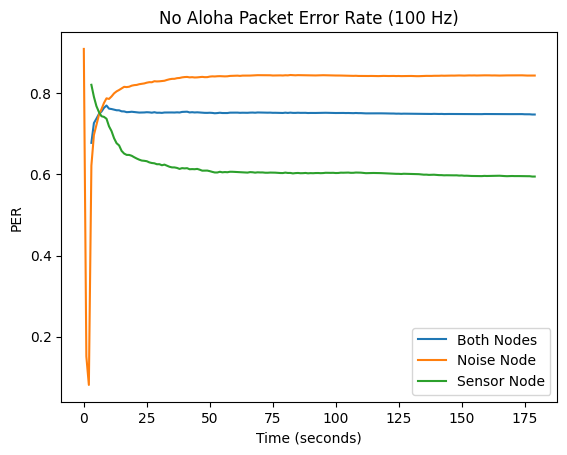

In [ ]:
outfile = 'no_aloha_stresstest_100hz.png'
data = load_rx_data(stress_test_files[2])
outfile = 'no_aloha_stresstest_100hz.png'
generate_per_graph(data, "No Aloha Packet Error Rate (100 Hz)", outfile=outfile)